In [3]:
import pandas as pd
import numpy as np 
from sklearn import datasets 
import plotly as plt 
# load the cvs data
#set target and features 
df= pd.read_csv("trainDataDiabete.csv")
target = df['Diabetes']
features = df.drop('Diabetes', axis=1)
print(df)

       Unnamed: 0   Age  Sex  HighChol  CholCheck   BMI  Smoker  \
0           10491   8.0  0.0       0.0        0.0  27.0     1.0   
1           42152  13.0  1.0       1.0        1.0  25.0     1.0   
2           61151  11.0  1.0       1.0        1.0  30.0     1.0   
3           14378   9.0  0.0       0.0        1.0  19.0     1.0   
4           50528   8.0  1.0       1.0        1.0  37.0     0.0   
...           ...   ...  ...       ...        ...   ...     ...   
25444       31691   7.0  1.0       0.0        0.0  30.0     0.0   
25445        4762  10.0  1.0       0.0        1.0  36.0     0.0   
25446       49179  12.0  1.0       1.0        1.0  33.0     0.0   
25447       48259  13.0  0.0       0.0        1.0  33.0     1.0   
25448       14962   5.0  0.0       1.0        1.0  26.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                       0.0           1.0     0.0      1.0                0.0   
1                       0.0      

In [4]:
df.isna().sum()

Unnamed: 0               0
Age                     14
Sex                     19
HighChol                12
CholCheck               18
BMI                     20
Smoker                  15
HeartDiseaseorAttack    16
PhysActivity            22
Fruits                  16
Veggies                 30
HvyAlcoholConsump       16
GenHlth                 19
MentHlth                17
PhysHlth                23
DiffWalk                18
Diabetes                 0
dtype: int64

In [7]:
# set null value of float with average
# set nll value of int with 0 
df['BMI'].fillna(int(df['BMI'].mean()), inplace=True)
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df["Sex"] = df["Sex"].fillna(0)
df['HighChol'] = df['HighChol'].fillna(0)
df['CholCheck'] =df['CholCheck'].fillna(0)
df['Smoker']=df['Smoker'].fillna(0)
df['HeartDiseaseorAttack']= df['HeartDiseaseorAttack'].fillna(0)
df['PhysActivity']=df['PhysActivity'].fillna(0)
df['Fruits']=df['Fruits'].fillna(0)
df['Veggies']=df['Veggies'].fillna(0)
df['HvyAlcoholConsump']=df['HvyAlcoholConsump'].fillna(0)
df['GenHlth']=df['GenHlth'].fillna(1)
df['MentHlth'] =df['MentHlth'].fillna(0)
df['PhysHlth']=df['PhysHlth'].fillna(0)
df['DiffWalk']=df['DiffWalk'].fillna(0)
df.isna().sum()

Unnamed: 0              0
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
dtype: int64

In [ ]:
#print information about the dataframe
print(df.info())

In [ ]:
#print informations in more details
print(df.describe())

In [8]:
print(df.corr())

                      Unnamed: 0       Age       Sex  HighChol  CholCheck  \
Unnamed: 0              1.000000  0.240893  0.038332  0.248353   0.099988   
Age                     0.240893  1.000000  0.002126  0.243648   0.095293   
Sex                     0.038332  0.002126  1.000000  0.025224  -0.005547   
HighChol                0.248353  0.243648  0.025224  1.000000   0.090544   
CholCheck               0.099988  0.095293 -0.005547  0.090544   1.000000   
BMI                     0.253240 -0.037483 -0.000528  0.134209   0.039614   
Smoker                  0.070416  0.107546  0.106464  0.096264  -0.007394   
HeartDiseaseorAttack    0.190379  0.216604  0.105866  0.183839   0.046030   
PhysActivity           -0.142129 -0.100626  0.055151 -0.086773  -0.009354   
Fruits                 -0.051069  0.061793 -0.070835 -0.042541   0.020749   
Veggies                -0.062895 -0.023914 -0.047619 -0.046006  -0.005258   
HvyAlcoholConsump      -0.088726 -0.059707  0.012228 -0.023185  -0.025413   

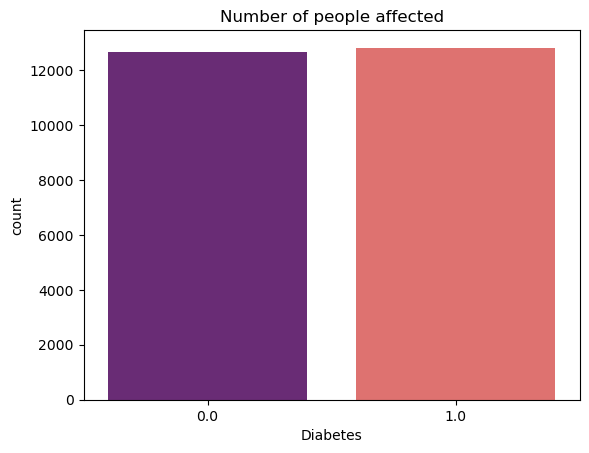

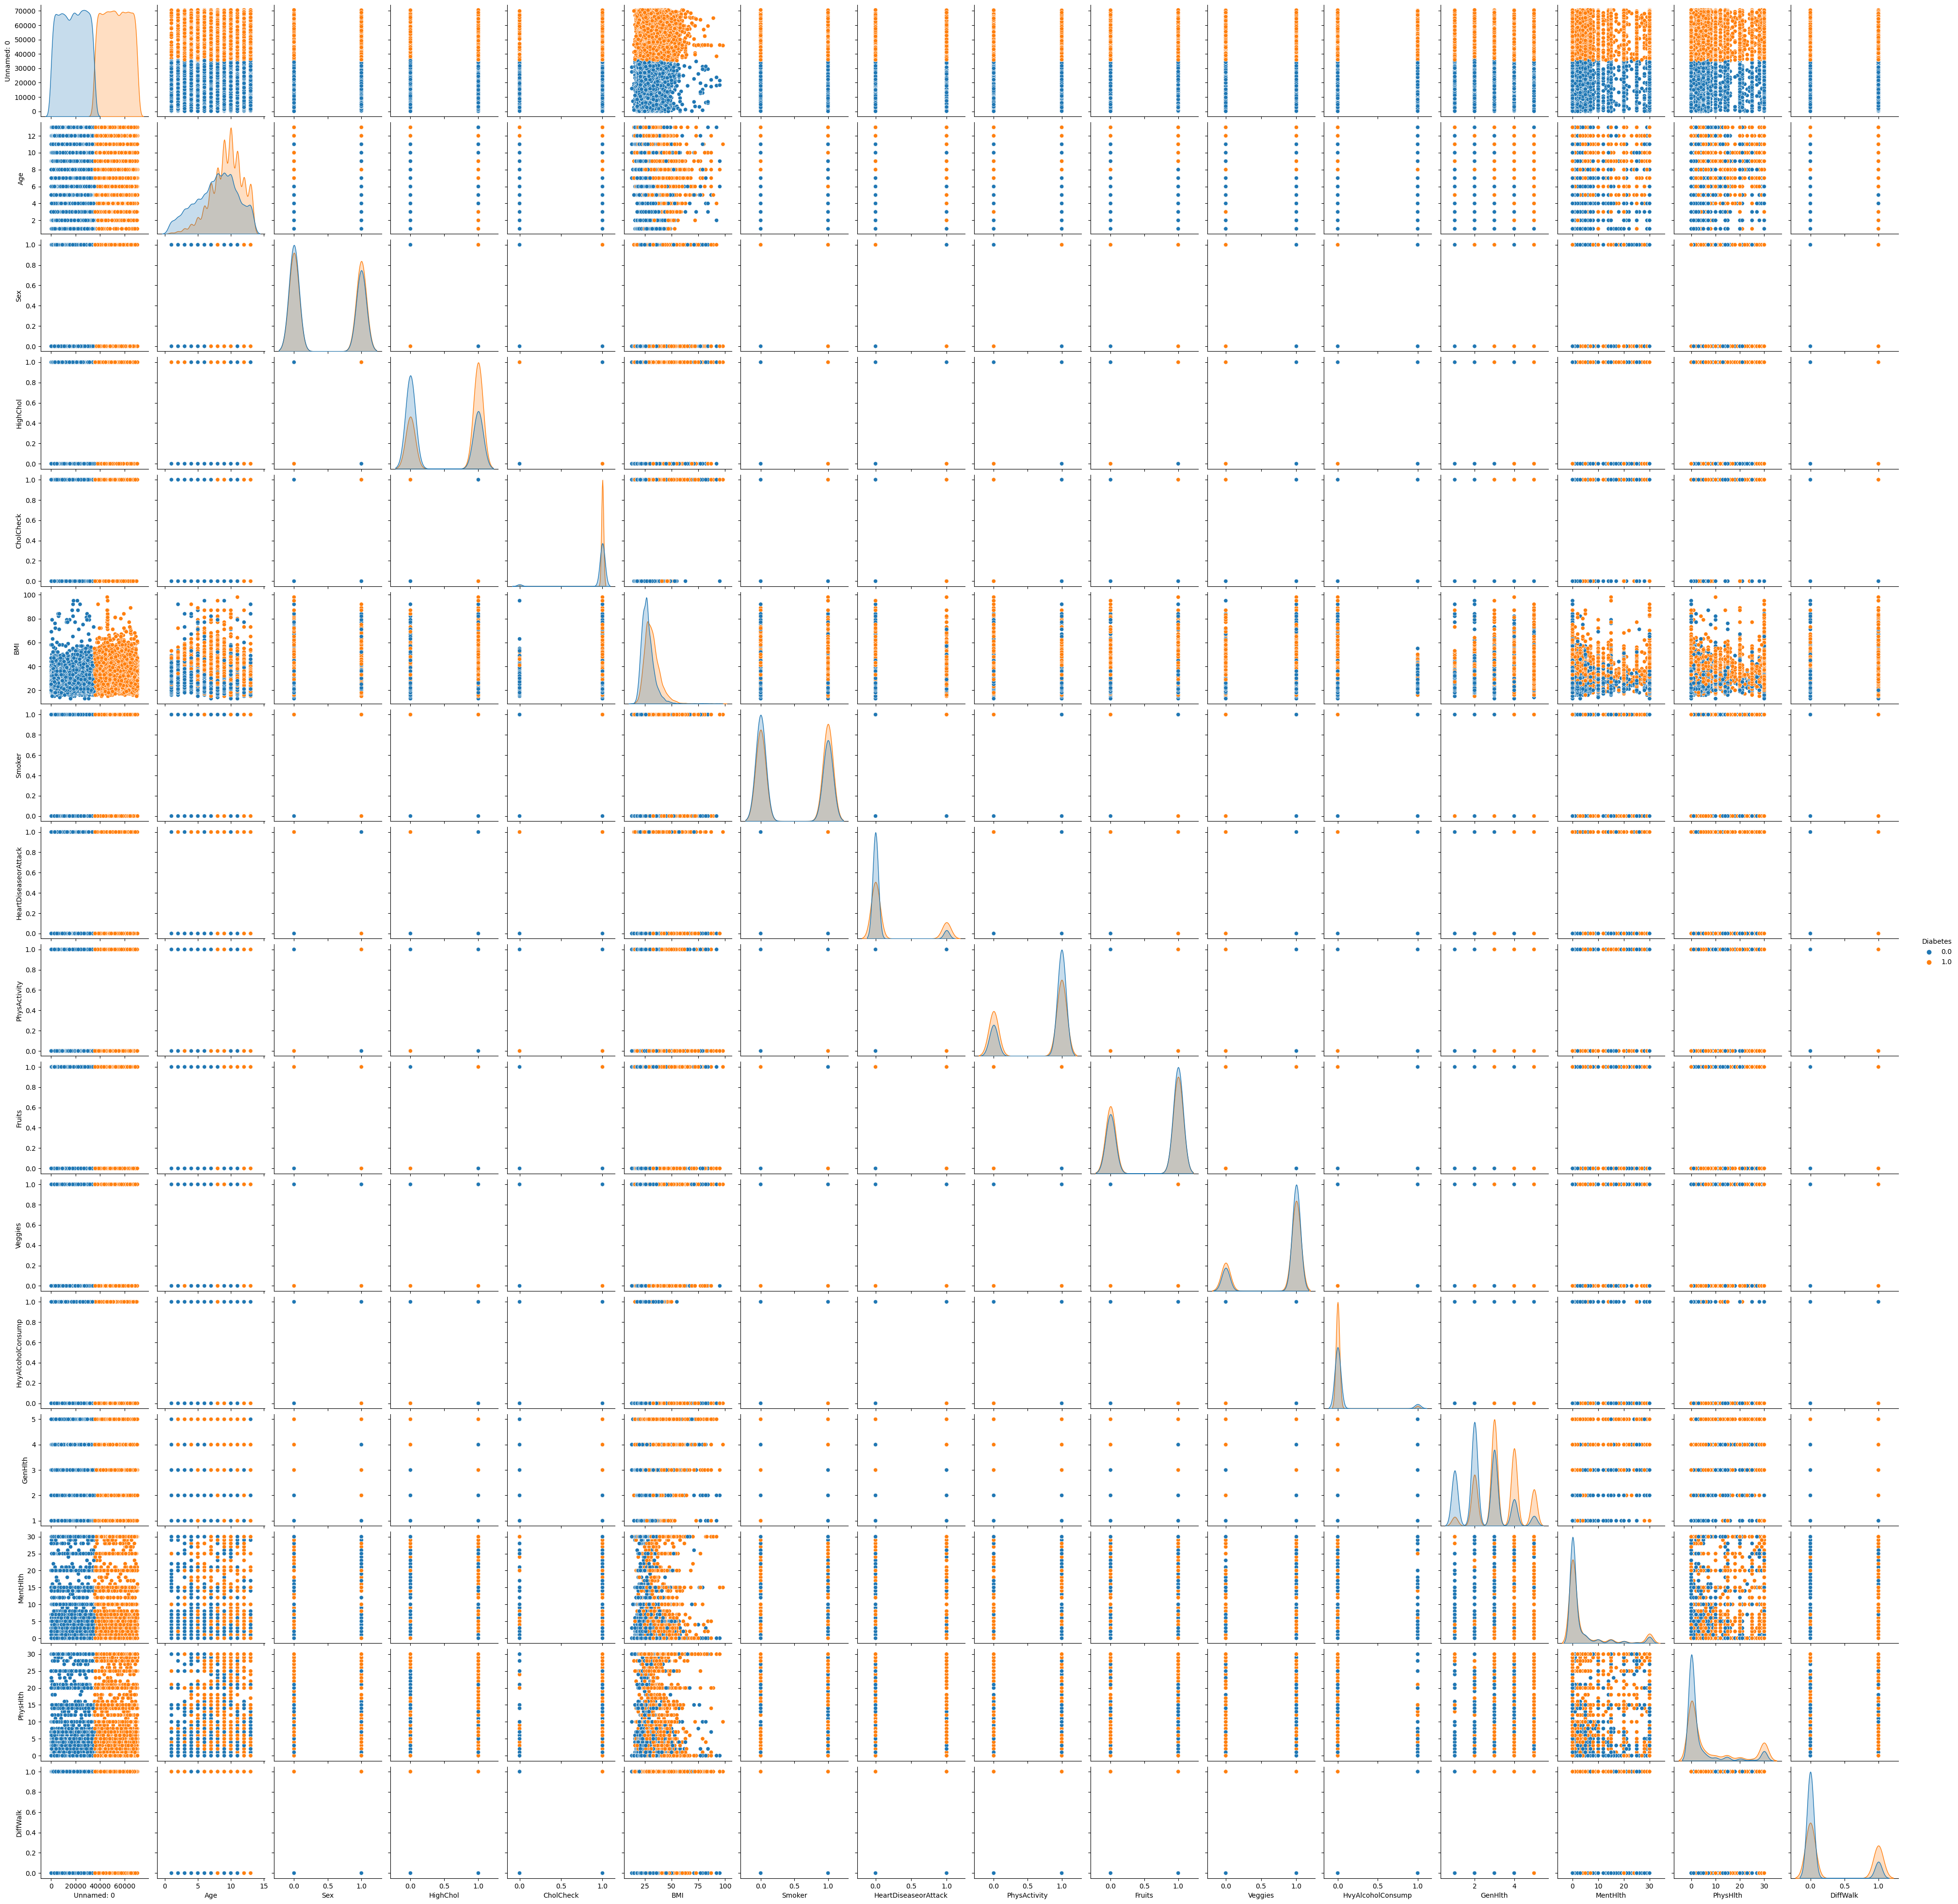

In [9]:
# two plotting 
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df , x='Diabetes', palette='magma')
plt.title('Number of people affected')

sns.pairplot(df, hue="Diabetes")

In [10]:
# split test train
# Logical Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test,y_train,y_test=train_test_split(df.iloc[:,
[0]],df['Diabetes'], test_size=0.25,random_state=1,stratify = target)
logR_model=LogisticRegression()
logR_model.fit(x_train,y_train)
y_pred=logR_model.predict(x_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[   1 3159]
 [   0 3203]]
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      3160
         1.0       0.50      1.00      0.67      3203

    accuracy                           0.50      6363
   macro avg       0.75      0.50      0.34      6363
weighted avg       0.75      0.50      0.34      6363



In [11]:
# Rain Forest classification 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[3160    0]
 [   0 3203]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3160
         1.0       1.00      1.00      1.00      3203

    accuracy                           1.00      6363
   macro avg       1.00      1.00      1.00      6363
weighted avg       1.00      1.00      1.00      6363



In [12]:
#Support Vector Machines Classification 
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train, y_train)
y_pred=svc_model.predict(x_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[3160    0]
 [   1 3202]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3160
         1.0       1.00      1.00      1.00      3203

    accuracy                           1.00      6363
   macro avg       1.00      1.00      1.00      6363
weighted avg       1.00      1.00      1.00      6363



In [14]:
df1 = pd.read_csv("trainDataDiabete.csv")
print(df1)
df1.isna().sum()

       Unnamed: 0   Age  Sex  HighChol  CholCheck   BMI  Smoker  \
0           10491   8.0  0.0       0.0        0.0  27.0     1.0   
1           42152  13.0  1.0       1.0        1.0  25.0     1.0   
2           61151  11.0  1.0       1.0        1.0  30.0     1.0   
3           14378   9.0  0.0       0.0        1.0  19.0     1.0   
4           50528   8.0  1.0       1.0        1.0  37.0     0.0   
...           ...   ...  ...       ...        ...   ...     ...   
25444       31691   7.0  1.0       0.0        0.0  30.0     0.0   
25445        4762  10.0  1.0       0.0        1.0  36.0     0.0   
25446       49179  12.0  1.0       1.0        1.0  33.0     0.0   
25447       48259  13.0  0.0       0.0        1.0  33.0     1.0   
25448       14962   5.0  0.0       1.0        1.0  26.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                       0.0           1.0     0.0      1.0                0.0   
1                       0.0      

Unnamed: 0               0
Age                     14
Sex                     19
HighChol                12
CholCheck               18
BMI                     20
Smoker                  15
HeartDiseaseorAttack    16
PhysActivity            22
Fruits                  16
Veggies                 30
HvyAlcoholConsump       16
GenHlth                 19
MentHlth                17
PhysHlth                23
DiffWalk                18
Diabetes                 0
dtype: int64

In [15]:
# set null value of float with average
# set nll value of int with 0 
df1['BMI'].fillna(int(df1['BMI'].mean()), inplace=True)
df1['Age'].fillna(int(df1['Age'].mean()), inplace=True)
df1["Sex"] = df1["Sex"].fillna(0)
df1['HighChol'] = df1['HighChol'].fillna(0)
df1['CholCheck'] =df1['CholCheck'].fillna(0)
df1['Smoker']=df1['Smoker'].fillna(0)
df1['HeartDiseaseorAttack']= df1['HeartDiseaseorAttack'].fillna(0)
df1['PhysActivity']=df1['PhysActivity'].fillna(0)
df1['Fruits']=df1['Fruits'].fillna(0)
df1['Veggies']=df1['Veggies'].fillna(0)
df1['HvyAlcoholConsump']=df['HvyAlcoholConsump'].fillna(0)
df1['GenHlth']=df1['GenHlth'].fillna(1)
df1['MentHlth'] =df1['MentHlth'].fillna(0)
df1['PhysHlth']=df1['PhysHlth'].fillna(0)
df1['DiffWalk']=df1['DiffWalk'].fillna(0)
df1.isna().sum()

Unnamed: 0              0
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
dtype: int64

In [16]:
# test data without target using logistic regression 
X = df1.iloc[:, [1,15]].values
y = df1.iloc[:,15].values

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [21]:
Y_pred = classifier.predict(X_test) 
Y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))
print(cm)

Accuracy :  1.0
[[5700    0]
 [   0 1935]]
